<div style="background-color:#e6f2ff; padding:20px; border-radius:10px;">
<img style="float:left; margin-right:20px;" src='alinco.png' width="120"/>
<h1 style="color:#000047;">Actividad 1: Extracción de datos de diferentes fuentes</h1>
<br style="clear:both"/>
</div>

<div style="border-left:4px solid #000047; padding:10px; margin-top:10px; background:#f5f5f5;">
<b>Objetivo:</b> Practicar la extracción, análisis y manipulación de datos provenientes de archivos JSON, XML, CSV e imágenes usando Python.
</div>

<div style="margin-top:10px;">
<b>Instrucciones generales:</b>
<ul>
<li>Lee cuidadosamente cada sección y realiza los ejercicios propuestos.</li>
<li>Utiliza <b>pandas</b> para manipulación de datos tabulares, <b>json</b> y <b>xml.etree.ElementTree</b> para extracción de datos, y <b>matplotlib</b> o <b>opencv</b> para imágenes.</li>
<li>Responde cada pregunta con código y, cuando sea necesario, justifica tu respuesta.</li>
</ul>
</div>

In [10]:
import sys
import os

venv_path = '/home/miguel/www/Herramientas_Aplicaciones_IA_2025/venv/lib/python3.13/site-packages'
if venv_path not in sys.path:
    sys.path.insert(0, venv_path)

print("✓ Entorno virtual configurado correctamente")
print(f"Python ejecutable: {sys.executable}")


✓ Entorno virtual configurado correctamente
Python ejecutable: /home/miguel/www/Herramientas_Aplicaciones_IA_2025/.venv/bin/python


## 1️⃣ JSON: Información de empleados

Supón que tienes el archivo <code>empleados.json</code> con la siguiente estructura:

```json
[
  {"nombre": "Ana", "edad": 28, "departamento": "Ventas", "salario": 2500},
  {"nombre": "Luis", "edad": 35, "departamento": "IT", "salario": 3200},
  {"nombre": "María", "edad": 24, "departamento": "Ventas", "salario": 2300},
  {"nombre": "Carlos", "edad": 40, "departamento": "IT", "salario": 4000}
]
```

<b>Ejercicios:</b>

1. Crea un DataFrame a partir de la extracción de información de este archivo JSON.
2. ¿Cuál es el <b>salario promedio por departamento</b>?
3. ¿Quién es el <b>empleado más joven</b> y a qué departamento pertenece?
4. ¿Cuántos empleados tienen un <b>salario mayor a 2500</b>?
5. ¿Cuál es la <b>diferencia de edad</b> entre el empleado más joven y el de mayor edad?
6. ¿Cuál es el <b>salario total pagado</b> en la empresa?

<i>Tip: Usa pandas.read_json o json.load para cargar los datos.</i>

In [11]:
import pandas as pd
import json

# abrir el archivo json
archivo = open('empleados.json', 'r', encoding='utf-8')
datos = json.load(archivo)
archivo.close()

# crear dataframe
df_empleados = pd.DataFrame(datos)
print("DataFrame de empleados:")
print(df_empleados)
print("\n")

# calcular salario promedio por depto
promedio = df_empleados.groupby('departamento')['salario'].mean()
print("2. Salario promedio por departamento:")
print(promedio)
print("\n")

# buscar el empleado mas joven
mas_joven = df_empleados.loc[df_empleados['edad'].idxmin()]
print(f"3. Empleado más joven: {mas_joven['nombre']} con {mas_joven['edad']} años")
print(f"   Departamento: {mas_joven['departamento']}")
print("\n")

# contar empleados con salario mayor a 2500
total_alto = len(df_empleados[df_empleados['salario'] > 2500])
print(f"4. Empleados con salario mayor a 2500: {total_alto}")
print("\n")

# diferencia de edades
edad_max = df_empleados['edad'].max()
edad_min = df_empleados['edad'].min()
dif = edad_max - edad_min
print(f"5. Diferencia de edad entre el más joven y el mayor: {dif} años")
print("\n")

# suma total de salarios
total = df_empleados['salario'].sum()
print(f"6. Salario total pagado en la empresa: ${total}")

DataFrame de empleados:
   nombre  edad departamento  salario
0     Ana    28       Ventas     2500
1    Luis    35           IT     3200
2   María    24       Ventas     2300
3  Carlos    40           IT     4000


2. Salario promedio por departamento:
departamento
IT        3600.0
Ventas    2400.0
Name: salario, dtype: float64


3. Empleado más joven: María con 24 años
   Departamento: Ventas


4. Empleados con salario mayor a 2500: 2


5. Diferencia de edad entre el más joven y el mayor: 16 años


6. Salario total pagado en la empresa: $12000


## 2️⃣ XML: Catálogo de libros

Supón que tienes el archivo <code>libros.xml</code> con la siguiente estructura:

```xml
<libros>
  <libro>
    <titulo>Python para Todos</titulo>
    <autor>Juan Pérez</autor>
    <precio>29.99</precio>
    <anio>2020</anio>
  </libro>
  <libro>
    <titulo>Data Science Avanzado</titulo>
    <autor>María López</autor>
    <precio>45.50</precio>
    <anio>2022</anio>
  </libro>
  <libro>
    <titulo>Ingeniería de Características</titulo>
    <autor>Pedro Ruiz</autor>
    <precio>39.00</precio>
    <anio>2019</anio>
  </libro>
</libros>
```

<b>Ejercicios:</b>

1. Crea un DataFrame a partir de la extracción de información de este archivo XML.
2. ¿Cuál es el <b>libro más caro</b> y su autor?
3. ¿Cuál es el <b>precio promedio</b> de los libros publicados después de 2020?
4. ¿Cuántos libros fueron <b>publicados antes de 2021</b>?
5. ¿Cuál es la <b>diferencia de precio</b> entre el libro más barato y el más caro?
6. ¿Cuántos <b>autores diferentes</b> hay en la lista?

<i>Tip: Usa xml.etree.ElementTree para leer el archivo y pandas para tabular los datos.</i>

In [12]:
import pandas as pd
import xml.etree.ElementTree as ET

# leer archivo xml
arbol = ET.parse('libros.xml')
raiz = arbol.getroot()

# extraer info de cada libro
lista_libros = []
for libro in raiz.findall('libro'):
    titulo = libro.find('titulo').text
    autor = libro.find('autor').text
    precio = float(libro.find('precio').text)
    anio = int(libro.find('anio').text)
    
    lista_libros.append({
        'titulo': titulo,
        'autor': autor, 
        'precio': precio,
        'anio': anio
    })

df_libros = pd.DataFrame(lista_libros)
print("DataFrame de libros:")
print(df_libros)
print("\n")

# libro mas caro
idx_caro = df_libros['precio'].idxmax()
libro_mas_caro = df_libros.loc[idx_caro]
print(f"2. Libro más caro: '{libro_mas_caro['titulo']}' - Precio: ${libro_mas_caro['precio']}")
print(f"   Autor: {libro_mas_caro['autor']}")
print("\n")

# precio promedio despues de 2020
libros_recientes = df_libros[df_libros['anio'] > 2020]
promedio = libros_recientes['precio'].mean()
print(f"3. Precio promedio de libros publicados después de 2020: ${promedio:.2f}")
print("\n")

# contar libros antes de 2021
cantidad = len(df_libros[df_libros['anio'] < 2021])
print(f"4. Libros publicados antes de 2021: {cantidad}")
print("\n")

# diferencia de precios
precio_max = df_libros['precio'].max()
precio_min = df_libros['precio'].min()
diferencia = precio_max - precio_min
print(f"5. Diferencia de precio entre el más barato y el más caro: ${diferencia:.2f}")
print("\n")

# autores unicos
num_autores = df_libros['autor'].nunique()
print(f"6. Cantidad de autores diferentes: {num_autores}")

DataFrame de libros:
                          titulo        autor  precio  anio
0              Python para Todos   Juan Pérez   29.99  2020
1          Data Science Avanzado  María López   45.50  2022
2  Ingeniería de Características   Pedro Ruiz   39.00  2019


2. Libro más caro: 'Data Science Avanzado' - Precio: $45.5
   Autor: María López


3. Precio promedio de libros publicados después de 2020: $45.50


4. Libros publicados antes de 2021: 2


5. Diferencia de precio entre el más barato y el más caro: $15.51


6. Cantidad de autores diferentes: 3


## 3️⃣ CSV: Ventas detalladas

Supón que tienes el archivo <code>ventas_detalladas.csv</code> con la siguiente estructura:

```csv
producto,fecha,cantidad,precio_unitario
A,2023-01-01,10,2.5
B,2023-01-02,5,3.0
A,2023-01-03,7,2.5
C,2023-01-01,3,4.0
B,2023-01-03,2,3.0
```

<b>Ejercicios:</b>

1. Crea un DataFrame con los datos extraídos del archivo.
2. ¿Cuál es el <b>total vendido</b> por producto y por fecha?
3. ¿En qué fecha se vendió la <b>mayor cantidad de productos</b>?
4. ¿Cuál es el <b>producto con mayor ingreso total</b>?
5. ¿Cuál es la <b>media de cantidad vendida</b> por producto?
6. ¿Qué producto tuvo <b>ventas todos los días registrados</b>?

<i>Tip: Usa pandas.read_csv y agrupa los datos según lo que se pide.</i>

In [13]:
import pandas as pd

# cargar csv
df_ventas = pd.read_csv('ventas_detalladas.csv', index_col=0)
print("DataFrame de ventas:")
print(df_ventas)
print("\n")

# agregar columna de total
df_ventas['total'] = df_ventas['cantidad'] * df_ventas['precio_unitario']

# total por producto
print("2. Total vendido por producto:")
por_producto = df_ventas.groupby('producto')['total'].sum()
print(por_producto)

# total por fecha
print("\nTotal vendido por fecha:")
por_fecha = df_ventas.groupby('fecha')['total'].sum()
print(por_fecha)
print("\n")

# fecha con mayor cantidad
cant_fecha = df_ventas.groupby('fecha')['cantidad'].sum()
fecha_max = cant_fecha.idxmax()
print(f"3. Fecha con mayor cantidad de productos vendidos: {fecha_max}")
print(f"   Cantidad vendida: {cant_fecha[fecha_max]} unidades")
print("\n")

# producto con mayor ingreso
ingresos = df_ventas.groupby('producto')['total'].sum()
mejor_producto = ingresos.idxmax()
print(f"4. Producto con mayor ingreso total: {mejor_producto}")
print(f"   Ingreso: ${ingresos[mejor_producto]:.2f}")
print("\n")

# media por producto
media = df_ventas.groupby('producto')['cantidad'].mean()
print("5. Media de cantidad vendida por producto:")
print(media)
print("\n")

# producto vendido todos los dias
total_fechas = df_ventas['fecha'].nunique()
dias_por_producto = df_ventas.groupby('producto')['fecha'].nunique()
todos_dias = dias_por_producto[dias_por_producto == total_fechas]

if len(todos_dias) > 0:
    print(f"6. Productos vendidos todos los días: {list(todos_dias.index)}")
else:
    print("6. Ningún producto fue vendido todos los días registrados")

DataFrame de ventas:
  producto       fecha  cantidad  precio_unitario
0        A  2023-01-01        10              2.5
1        B  2023-01-02         5              3.0
2        A  2023-01-03         7              2.5
3        C  2023-01-01         3              4.0
4        B  2023-01-03         2              3.0


2. Total vendido por producto:
producto
A    42.5
B    21.0
C    12.0
Name: total, dtype: float64

Total vendido por fecha:
fecha
2023-01-01    37.0
2023-01-02    15.0
2023-01-03    23.5
Name: total, dtype: float64


3. Fecha con mayor cantidad de productos vendidos: 2023-01-01
   Cantidad vendida: 13 unidades


4. Producto con mayor ingreso total: A
   Ingreso: $42.50


5. Media de cantidad vendida por producto:
producto
A    8.5
B    3.5
C    3.0
Name: cantidad, dtype: float64


6. Ningún producto fue vendido todos los días registrados


## 4️⃣ Imágenes: Análisis de pixeles

Supón que tienes la imagen <code>alinco.png</code> en la misma carpeta que este notebook.

<b>Ejercicios:</b>

1. Extrae la información de los pixeles de la imagen y muestra sus dimensiones.
2. ¿Cuál es el <b>valor RGB</b> del píxel (50, 50)?
3. ¿Cuál es el <b>color predominante</b> en la imagen?

<i>Tip: Usa matplotlib.pyplot.imread o cv2.imread para cargar la imagen y numpy para analizar los datos.</i>

1. Información de la imagen:
   Dimensiones: (110, 120, 4)
   Alto: 110 píxeles
   Ancho: 120 píxeles
   Canales: 4




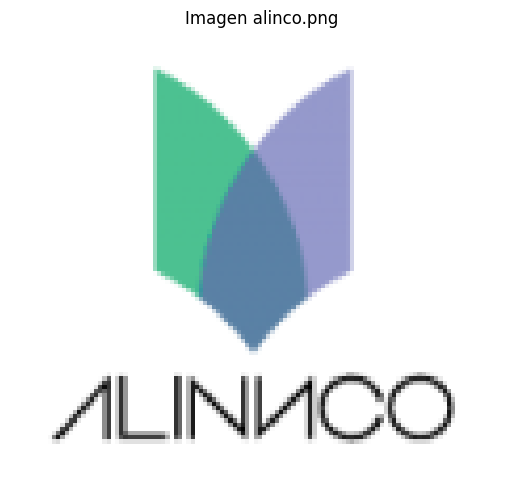



2. Valor RGB del píxel (50, 50):
   R: 0.3490, G: 0.5020, B: 0.6471, A: 1.0000


3. Análisis del color predominante:
   Color promedio (RGB): R=0.0578, G=0.1092, B=0.1134
   Canal dominante: Azul


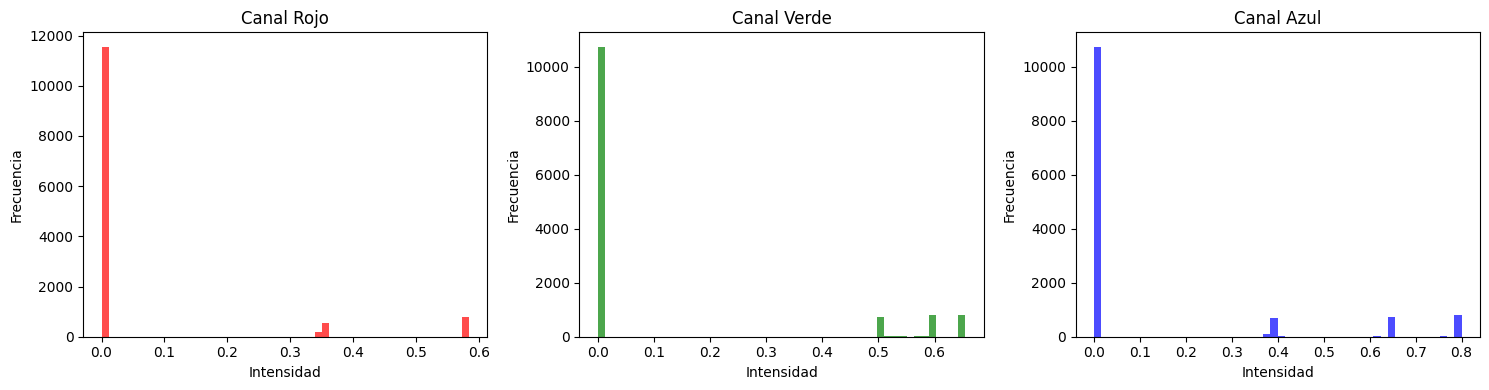

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# leer imagen
img = plt.imread('alinco.png')

print("1. Información de la imagen:")
print(f"   Dimensiones: {img.shape}")
print(f"   Alto: {img.shape[0]} píxeles")
print(f"   Ancho: {img.shape[1]} píxeles")
if len(img.shape) == 3:
    print(f"   Canales: {img.shape[2]}")
print("\n")

# mostrar imagen
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.title('Imagen alinco.png')
plt.axis('off')
plt.show()
print("\n")

# obtener pixel en posicion 50,50
pixel = img[50, 50]
print(f"2. Valor RGB del píxel (50, 50):")
if len(img.shape) == 3:
    if img.shape[2] == 4:  # tiene canal alpha
        print(f"   R: {pixel[0]:.4f}, G: {pixel[1]:.4f}, B: {pixel[2]:.4f}, A: {pixel[3]:.4f}")
    else:
        print(f"   R: {pixel[0]:.4f}, G: {pixel[1]:.4f}, B: {pixel[2]:.4f}")
else:
    print(f"   Valor (escala de grises): {pixel:.4f}")
print("\n")

# analizar color predominante
print("3. Análisis del color predominante:")
if len(img.shape) == 3:
    # convertir a lista de pixeles
    if img.shape[2] == 4:
        pixeles = img[:, :, :3].reshape(-1, 3)  # sin alpha
    else:
        pixeles = img.reshape(-1, img.shape[2])
    
    # calcular promedio
    promedio = pixeles.mean(axis=0)
    print(f"   Color promedio (RGB): R={promedio[0]:.4f}, G={promedio[1]:.4f}, B={promedio[2]:.4f}")
    
    # ver cual canal es mayor
    nombres = ['Rojo', 'Verde', 'Azul']
    idx_max = np.argmax(promedio)
    print(f"   Canal dominante: {nombres[idx_max]}")
    
    # graficar histogramas
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    colores = ['red', 'green', 'blue']
    titulos = ['Canal Rojo', 'Canal Verde', 'Canal Azul']
    
    for i in range(3):
        axes[i].hist(pixeles[:, i], bins=50, color=colores[i], alpha=0.7)
        axes[i].set_title(titulos[i])
        axes[i].set_xlabel('Intensidad')
        axes[i].set_ylabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()
else:
    print("   La imagen está en escala de grises")
    print(f"   Valor promedio: {img.mean():.4f}")